In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy import stats, spatial

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
from trackml.dataset import load_event
hits, cells, particles, truth = load_event('data/train_100_events/event000001000')

In [5]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [6]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [7]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [8]:
np.unique(particles.q)

array([-1,  1], dtype=int32)

In [9]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


# Paths?

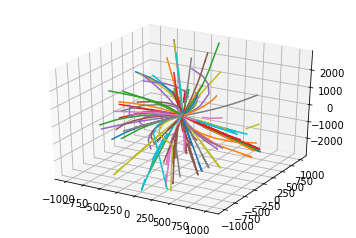

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

particle_ids = np.unique(particles[particles.q == -1].particle_id)[1:100]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    
    ax.plot(particle_hits.x.values, particle_hits.y.values, particle_hits.z.values)
    
plt.show()

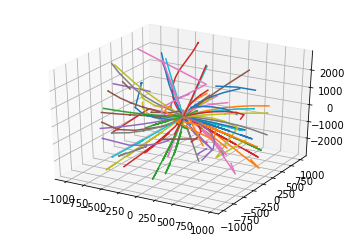

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

particle_ids = np.unique(particles[particles.q == 1].particle_id)[1:100]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    
    ax.plot(particle_hits.x.values, particle_hits.y.values, particle_hits.z.values)
    
plt.show()

# Angles

In [12]:
def angle(u,v):
    costheta = (np.dot(u,v)/np.sqrt(np.dot(u,u)*np.dot(v,v)))
    return(np.arccos(costheta)*180/np.pi)

In [13]:
pos_angles = []
particle_ids = np.unique(particles[particles.q == 1].particle_id)[:500]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    if len(particle_hits >=3):

        diff_hits = particle_hits[['x','y','z']].diff().reset_index()[1:]
        del diff_hits['index']
        diff_hits

        for i in diff_hits.index.values[:-1]:
            u = diff_hits.loc[i]; v = diff_hits.loc[i+1]
            pos_angles.append(angle(u,v))
pos_angles = np.array(pos_angles)

(array([ 1958.,    98.,    17.,     9.,    11.,    11.,    10.,    22.,
           53.,   927.]),
 array([   0.        ,   17.99802111,   35.99604222,   53.99406334,
          71.99208445,   89.99010556,  107.98812667,  125.98614778,
         143.9841689 ,  161.98219001,  179.98021112]),
 <a list of 10 Patch objects>)

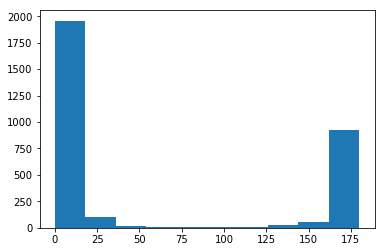

In [14]:
plt.hist(pos_angles[~np.isnan(pos_angles)])

(array([ 23.,   7.,   5.,   6.,   9.,   6.,   9.,   6.,   7.,  25.]),
 array([  30.18024611,   42.1103678 ,   54.0404895 ,   65.97061119,
          77.90073288,   89.83085458,  101.76097627,  113.69109796,
         125.62121966,  137.55134135,  149.48146304]),
 <a list of 10 Patch objects>)

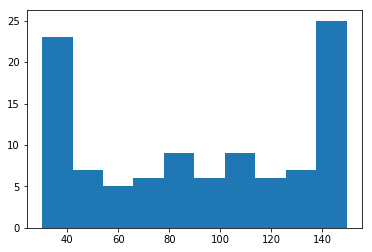

In [15]:
plt.hist(pos_angles[(~np.isnan(pos_angles)) & (pos_angles > 30) & (pos_angles < 150)])

In [16]:
neg_angles = []
particle_ids = np.unique(particles[particles.q == -1].particle_id)[:500]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    if len(particle_hits >=3):

        diff_hits = particle_hits[['x','y','z']].diff().reset_index()[1:]
        del diff_hits['index']
        diff_hits

        for i in diff_hits.index.values[:-1]:
            u = diff_hits.loc[i]; v = diff_hits.loc[i+1]
            neg_angles.append(angle(u,v))
neg_angles = np.array(neg_angles)

/home/hudson/anaconda3/envs/math189/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


(array([  2.44400000e+03,   8.30000000e+01,   1.60000000e+01,
          3.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   7.00000000e+00,   2.80000000e+01,
          1.05000000e+03]),
 array([   0.        ,   18.0000005 ,   36.000001  ,   54.0000015 ,
          72.000002  ,   90.0000025 ,  108.00000301,  126.00000351,
         144.00000401,  162.00000451,  180.00000501]),
 <a list of 10 Patch objects>)

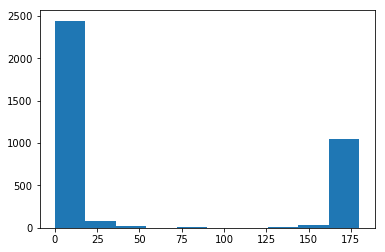

In [17]:
plt.hist(neg_angles[~np.isnan(neg_angles)])

# First Angle vs Initial Momentum?

In [18]:
pos_angles = []
particle_ids = np.unique(particles[particles.q == 1].particle_id)[:500]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    diff_hits = particle_hits[['x','y','z']].diff().reset_index()[1:]
    del diff_hits['index']
    if len(diff_hits) >=2:
        u = diff_hits.iloc[0]; v = diff_hits.iloc[1]
        a = angle(u,v)
        momenta = particles[particles.particle_id == particle_id][['px','py','pz']].values[0]
        momentum = np.sqrt(np.dot(momenta, momenta))
        pos_angles.append([a, momentum])
pos_angles = np.array(pos_angles)

## No relationship between momentum and first angle

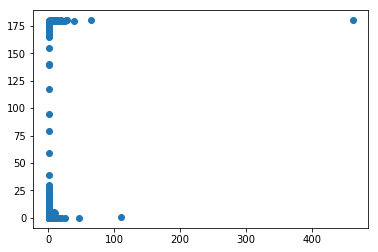

In [19]:
plt.scatter(pos_angles[:,1], pos_angles[:,0])

# Angle of incidence vs angle of reflection?

In [20]:
detectors = pd.read_csv('data/detectors.csv')
detectors.head()

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


In [21]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [86]:
angles_in = []
angles_out = []
angles_total = []
dots_in = []
dots_out = []
detector_positions = []
detector_normals = []
particles_data = []

particle_ids = np.unique(particles.particle_id)[:500]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    if len(hit_ids) >=3:
        particles_data.append(particle_id)
        hit_1 = hit_ids.iloc[0]
        hit_2 = hit_ids.iloc[1]
        hit_3 = hit_ids.iloc[2]

        vec_in = hits.iloc[hit_2-1][['x','y','z']] - hits.loc[hit_1-1][['x','y','z']]
        vec_out = hits.iloc[hit_3-1][['x','y','z']] - hits.loc[hit_2-1][['x','y','z']]

        detector_id = hits.loc[hit_2-1][['volume_id','layer_id','module_id']].values
        detector = detectors[(detectors['volume_id'] == detector_id[0]) & (detectors['layer_id'] == detector_id[1]) & (detectors['module_id'] == detector_id[2])]

        detector_pos = detector[['cx', 'cy', 'cz']].values[0]
        detector_positions.append(detector_pos)
        rotation_mat = detector[['rot_xu', 'rot_xv','rot_xw', 'rot_yu', 'rot_yv','rot_yw', 'rot_zu', 'rot_zv','rot_zw']]
        rotation_mat = rotation_mat.values.reshape(3,3) 
        normal = rotation_mat @ np.array([0,0,1])
        detector_normals.append(normal)

        dot_in = np.dot(vec_in, normal)
        angle_in = angle(vec_in, normal)
        dot_out = np.dot(vec_out, normal)
        angle_out = angle(normal, vec_out)
        angle_total = angle(vec_in, vec_out)

        angles_in.append(angle_in)
        angles_out.append(angle_out)
        angles_total.append(angle_total)
        dots_in.append(dot_in)
        dots_out.append(dot_out)

In [87]:
associated_particles = particles[np.in1d(particles.particle_id, np.array(particles_data))]

# Some hits come from beind, some from the front

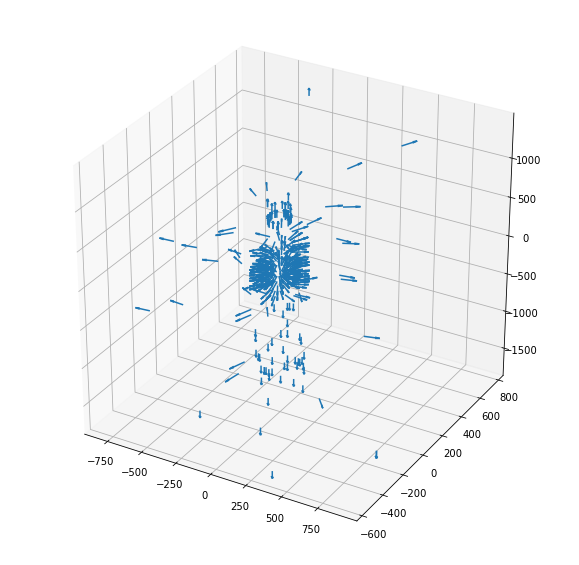

In [88]:
x, y, z = list(zip(*detector_positions))
u,v,w = list(zip(*detector_normals))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, u, v, w, length=100)

(array([  22.,  133.,  234.,    9.,    4.,    0.,    1.,    0.,    0.,    1.]),
 array([ -341.        ,  -168.570401  ,     3.859198  ,   176.288797  ,
          348.718396  ,   521.147995  ,   693.57759399,   866.00719299,
         1038.43679199,  1210.86639099,  1383.29598999]),
 <a list of 10 Patch objects>)

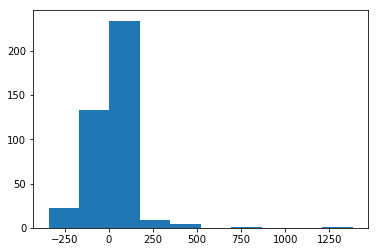

In [89]:
plt.hist(dots_in)

(array([ 63.,  71.,  53.,  98.,  40.,   6.,   5.,   2.,   7.,  59.]),
 array([   0.83632029,   18.57021938,   36.30411848,   54.03801757,
          71.77191666,   89.50581576,  107.23971485,  124.97361395,
         142.70751304,  160.44141213,  178.17531123]),
 <a list of 10 Patch objects>)

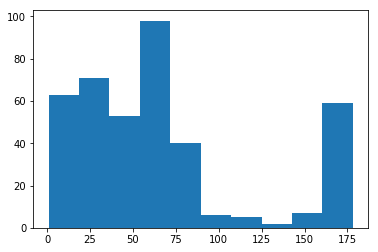

In [90]:
plt.hist(angles_in)

(array([   1.,    5.,    3.,   25.,  358.,   10.,    1.,    0.,    0.,    1.]),
 array([ -857.85337342,  -657.76803608,  -457.68269874,  -257.5973614 ,
          -57.51202405,   142.57331329,   342.65865063,   542.74398797,
          742.82932532,   942.91466266,  1143.        ]),
 <a list of 10 Patch objects>)

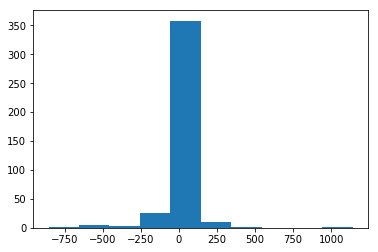

In [91]:
plt.hist(dots_out)

(array([  60.,   73.,   55.,  101.,   43.,    1.,    3.,    3.,    5.,   60.]),
 array([   1.78762149,   19.36520758,   36.94279367,   54.52037976,
          72.09796585,   89.67555194,  107.25313803,  124.83072412,
         142.40831022,  159.98589631,  177.5634824 ]),
 <a list of 10 Patch objects>)

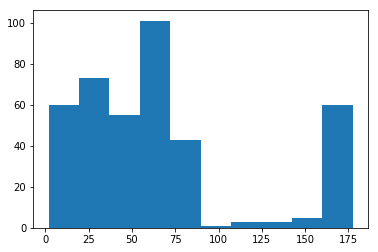

In [92]:
plt.hist(angles_out)

(array([ 321.,    5.,    0.,    0.,    1.,    0.,    0.,    1.,    2.,   74.]),
 array([  1.02919989e-02,   1.80067013e+01,   3.60031106e+01,
          5.39995199e+01,   7.19959292e+01,   8.99923385e+01,
          1.07988748e+02,   1.25985157e+02,   1.43981566e+02,
          1.61977976e+02,   1.79974385e+02]),
 <a list of 10 Patch objects>)

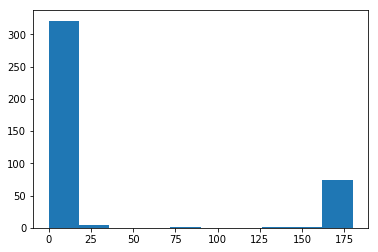

In [93]:
plt.hist(angles_total)

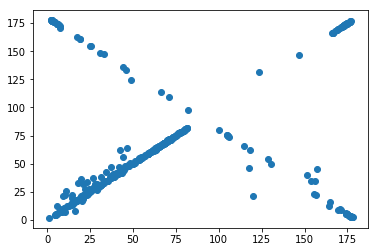

In [94]:
plt.scatter(angles_in, angles_out)

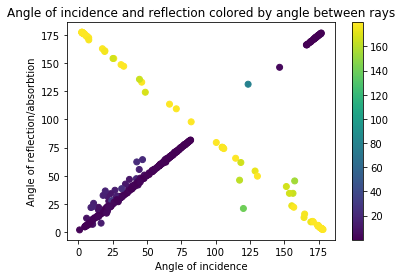

In [95]:
plt.scatter(angles_in, angles_out, c=angles_total)
plt.xlabel('Angle of incidence')
plt.ylabel('Angle of reflection/absorbtion')
plt.colorbar()
plt.title("Angle of incidence and reflection colored by angle between rays")
plt.show()

In [96]:
reflect = np.array(angles_total) >= 90
print(np.mean(reflect))
through = np.array(angles_total) < 90
print(np.mean(through))

0.190594059406
0.809405940594


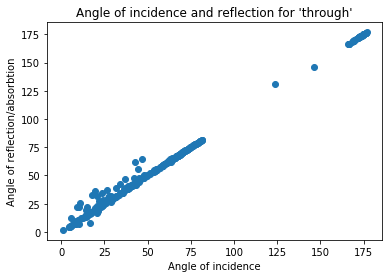

In [97]:
plt.scatter(np.array(angles_in)[through], np.array(angles_out)[through])
plt.xlabel('Angle of incidence')
plt.ylabel('Angle of reflection/absorbtion')
plt.title("Angle of incidence and reflection for 'through'")
plt.show()

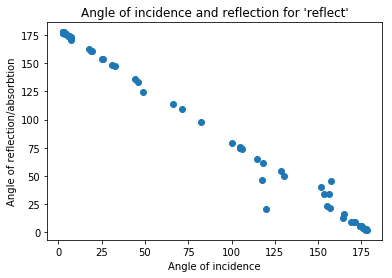

In [98]:
plt.scatter(np.array(angles_in)[reflect], np.array(angles_out)[reflect])
plt.xlabel('Angle of incidence')
plt.ylabel('Angle of reflection/absorbtion')
plt.title("Angle of incidence and reflection for 'reflect'")
plt.show()

In [108]:
momenta_reflect = associated_particles[reflect][['px', 'py','pz']]
momenta_reflect = np.sqrt(np.sum(np.square(momenta_reflect),1))
momenta_reflect.describe()

count    77.000000
mean      3.543110
std       5.168576
min       0.216698
25%       0.520384
50%       1.930508
75%       4.524375
max      25.955072
dtype: float64

In [109]:
momenta_through = associated_particles[through][['px', 'py','pz']]
momenta_through = np.sqrt(np.sum(np.square(momenta_through),1))
momenta_through.describe()

count    327.000000
mean       7.168631
std       29.029556
min        0.167671
25%        0.667400
50%        1.861596
75%        5.021260
max      461.760834
dtype: float64

# Difference in momentum!!

In [112]:
from scipy.stats import ttest_ind
ttest_ind(momenta_through, momenta_reflect, equal_var=False)

Ttest_indResult(statistic=2.1202067823658721, pvalue=0.03462042448154265)